# Introduction

This is a colab notebook. It is a special case of a ipython notebook in a specific interface. This is how you will do your analysis for this class. It requires a google account and is an example of an ipython notebook interface. 

This is an example of a text block. To add text blocks, simply click the "+ Text" button on the bar above the notebook. 

The code is marked up in a markup language called "Markdown". You can find a guide to markdown syntax here: [https://www.markdownguide.org/cheat-sheet/](https://www.markdownguide.org/cheat-sheet/).

Also, the [colab documentation](https://colab.research.google.com/notebooks/markdown_guide.ipynb) is useful.

Markdown should take you only a few moments to learn. It is as easy as a markup langauge can be made.



# Imports and files
The first thing we'll try is loading some data and plotting it. To do this, we'll need some packages. Let's load up pandas, a package for data management, and matplotlib. The python command for this is `import`.


In [0]:
import pandas as pd
import numpy as np

If you want to mount your google drive, do this. 

```
from google.colab import drive
drive.mount('/content/drive/')
```

Or, there's a little button on the left menu. (If you don't see it, click on the little arrow on the left hand side of the screen.)

We won't do this here, since we'll download our data from github.

To execute unix commands, do `!command`. For example, here I'm listing out the contents of the connected runtime for this notebook. For example, here I'm running the `ls` command for listing out the contents of a unix directory.

In [16]:
!ls

kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv  sample_data


Let's download the data. Or you could upload the data to google drive or directly upload to colab. 

In [0]:
! if [ ! -e kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv ] ; \
  then wget https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv; \
fi

The initial `!` says it's a unix command. The `if` statement asks whether the file already exists via `-e`. The `!` inside the brackets takes the opposite. So 

```
if [ ! -e kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv ] ;
```
test whether that file *does not* exist in the current working directory. If it does not, then it executes the following command:
```
wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv;
```
which grabs the file from my github repository over `https`. Then the `fi` statement ends the conditional statement. The `\` are required since colab notebook snippets don't work like a regular unix command line or shell script and the `\` tells colab to keep going on like this is the same line. If you were writing this in a shell script file, that would be unnecessary. 


# Reading data in with pandas

Let's now read in an MRICloud dataset using pandas. We want to use the function `read_csv` within pandas. Notice we imported pandas `as pd` so the command is `pd.read_csv`. 

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

Let's look at the first 4 rows of our dataframe. The object `dataset` is a `pandas` object with associated methods. One is `head` which allows one to see the first few rows of data. 

In [19]:
df.head(4)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1


# Working with the data

Let's get rid of the column `rawid` and the unnamed column since they're kind of useless for today's lecture. Also let's work with only the volume.

In [0]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

Now let's create a column called `icv` for intra-cranial volume. ICV is defined as the summ of the Type I Level 1 structures and cerebrospinal fluid. For the rest of this lecture, we're just going to look at this type and level.

In [21]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
## Create a new column based on ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1

,roi,volume,type,level,icv
0,Telencephalon_L,531111,1,1,1378295
1,Telencephalon_R,543404,1,1,1378295
2,Diencephalon_L,9683,1,1,1378295
3,Diencephalon_R,9678,1,1,1378295
4,Mesencephalon,10268,1,1,1378295
5,Metencephalon,159402,1,1,1378295
6,Myelencephalon,4973,1,1,1378295
7,CSF,109776,1,1,1378295


Now the TBV is defined as the sum of the volume for all rows except CSF. 

In [22]:
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1


,roi,volume,type,level,icv,tbv
0,Telencephalon_L,531111,1,1,1378295,1268519
1,Telencephalon_R,543404,1,1,1378295,1268519
2,Diencephalon_L,9683,1,1,1378295,1268519
3,Diencephalon_R,9678,1,1,1378295,1268519
4,Mesencephalon,10268,1,1,1378295,1268519
5,Metencephalon,159402,1,1,1378295,1268519
6,Myelencephalon,4973,1,1,1378295,1268519
7,CSF,109776,1,1,1378295,1268519


Let's look at brain composition.

In [23]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

## lambda means that for the arbitrary row, take that value.

,roi,volume,type,level,icv,tbv,comp
0,Telencephalon_L,531111,1,1,1378295,1268519,0.418686
1,Telencephalon_R,543404,1,1,1378295,1268519,0.428377
2,Diencephalon_L,9683,1,1,1378295,1268519,0.007633
3,Diencephalon_R,9678,1,1,1378295,1268519,0.007629
4,Mesencephalon,10268,1,1,1378295,1268519,0.008094
5,Metencephalon,159402,1,1,1378295,1268519,0.125660
6,Myelencephalon,4973,1,1,1378295,1268519,0.003920
7,CSF,109776,1,1,1378295,1268519,0.086539


# Plotting

Pandas has built in methods for plotting. Later on, we'll try different plotting packages. 

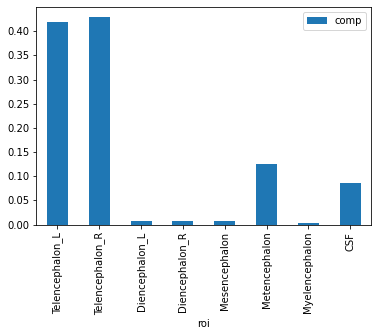

In [24]:
t1l1.plot.bar(x='roi',y='comp')

In [25]:
!pip install plotly==4.0.0

     |████████████████████████████████| 6.8MB 4.2MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.0.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


We can create an interactive plot with `plotly`. This is a professionally developed package that makes interactive plotting very easy. Also, it renders nicely within colab or jupyter notebooks. For plotly graphics, I would suggest assigning the graph to a variable then calling that variable to show the plot. This way you can modify the plot later if you'd like.

In [26]:
import plotly.express as px
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()